In [2]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Summary

In [3]:
Ltime2 = pd.read_pickle("./df_Ltime2.pkl")
Temperature = pd.read_pickle("./df_Temperature.pkl")

In [4]:
Ltime2

,0
0,18:48
1,20:17
2,21:37
3,23:14
4,01:00


In [5]:
def min_day(time):
    """
    input
    > time : (str) represented as HH:MM 
    
    output
    > minday : (min) order of minute of the day.
    
    """
    HH, MM = time.split(":")
    
    return int(HH)*60 + int(MM)

In [6]:
min_day_s0 = Ltime2[0].apply(min_day)
min_day_s0[5:]

Series([], Name: 0, dtype: int64)

In [16]:
min_day_s0 = Ltime2[0].apply(min_day)
min_day_s1 = min_day_s0.shift(1)

if np.where(min_day_s0 - min_day_s1 < 0)[0].any():
    next_day_flag = 1
    try:
        next_day_start = np.where(min_day_s0 - min_day_s1 < 0)[0][0]
    except:
        next_day_start = len(min_day_s0)

else:
    next_day_flag = 0

if next_day_flag:
    min_day_s0[next_day_start:] = min_day_s0[next_day_start:] + 1440
    
Ltime2["min_day"] = min_day_s0


In [8]:
Ltime2

,0,min_day
0,18:48,1128
1,20:17,1217
2,21:37,1297
3,23:14,1394
4,01:00,1500


In [9]:
Temperature

,0
0,210.643831
1,200.612015
2,192.659258
3,219.419681
4,192.953037


In [10]:
Ltime2

,0,min_day
0,18:48,1128
1,20:17,1217
2,21:37,1297
3,23:14,1394
4,01:00,1500


In [16]:
Ltime2 = Ltime2.append({0: "06:00", "min_day": 1800}, ignore_index=True)
Temperature = Temperature.append({0: Temperature[0].mean()}, ignore_index=True)

In [17]:
Ltime2

,0,min_day
0,18:48,1128
1,20:17,1217
2,21:37,1297
3,23:14,1394
4,01:00,1500
5,06:00,1800


In [11]:
Temperature

,0
0,210.643831
1,200.612015
2,192.659258
3,219.419681
4,192.953037


In [12]:
def min_HHMM(mins):
    HH = np.where(mins < 1440, mins//60, mins//60-24)
    MM = mins % 60
    
    HHMM = list(zip(HH, MM))

    return [f"{int(hh):02d}:{int(mm):02d}" for (hh, mm) in HHMM]


In [22]:
(24+7)*60 + 40

1900

In [23]:
def plot(Ltime2, Temperature):
    fig, ax = plt.subplots()
    ax.set_xlabel("Local Time")
    ax.set_ylabel("P1 (2) / P1 (4) Temperature (K)")
    ax.scatter(Ltime2["min_day"], Temperature[0], s=0)
    ax.scatter(Ltime2["min_day"].iloc[:-1], Temperature[0].iloc[:-1], s=30)
    ax.set_xlim(1000, 1900)
    xticks = ax.get_xticks()
    xticklabels = min_HHMM(xticks)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)
    ax.grid(True)
    fig.autofmt_xdate()
    
    return plt.show()

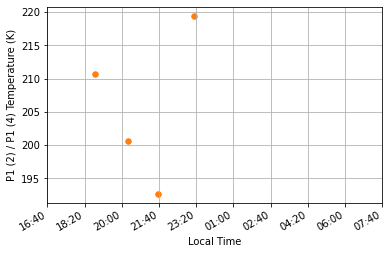

In [24]:
plot(Ltime2, Temperature)

In [27]:
Ltime3 = '2013-02-01'

In [30]:
def plot(Ltime2, Temperature, Ltime3): 

    # 1. Converting DatetimeIndex to DataFrame
    #- actually a bypass of data handling, to make it easy to be controlled
    Ltime2 = pd.DataFrame(Ltime2)
    Temperature = pd.DataFrame(Temperature)

    # 2. Time Standardization (min_day)
    #- represent HH:MM as mimute in a day
    #- the "next day" data has to be treated properly
    def min_day(time):
        """
        input
        > time : (str) represented as HH:MM 

        output
        > minday : (min) order of minute of the day.

        """
        HH, MM = time.split(":")

        return int(HH)*60 + int(MM)

    min_day_s0 = Ltime2[0].apply(min_day)
    min_day_s1 = min_day_s0.shift(1)

    if np.where(min_day_s0 - min_day_s1 < 0)[0].any():
        next_day_flag = 1
        next_day_start = np.where(min_day_s0 - min_day_s1 < 0)[0][0]
    
    else:
        next_day_flag = 0

    if next_day_flag:
        min_day_s0[next_day_start:] = min_day_s0[next_day_start:] + 1440

    Ltime2["min_day"] = min_day_s0

    # 3. Converting "min-day" to "HH:MM" format.
    #- for format transformation of xticklabels,
    #- regarding the "next day" data.
    def min_HHMM(mins):
        HH = np.where(mins < 1440, mins//60, mins//60-24)
        MM = mins % 60    
        HHMM = list(zip(HH, MM))
        return [f"{int(hh):02d}:{int(mm):02d}" for (hh, mm) in HHMM]

    # 4. visualization
    fig, ax = plt.subplots()
    ax.set_xlabel("Local Time")
    ax.set_ylabel("P1 (2) / P1 (4) Temperature (K)")

    # plot data
    ax.scatter(Ltime2["min_day"], Temperature[0], s=30, label=Ltime3)

    # set range of x axis from (16:40 ~ 07:40)
    ax.set_xlim(1000, 1900)
    
    # actually does nothing.
    # these lines are added to prevent Warning messages when set_xticklabels() are used without set_xticks()
    xticks = ax.get_xticks()
    ax.set_xticks(xticks)

    # convert xticklabels from min_day to HH:MM format
    xticklabels = min_HHMM(xticks)
    ax.set_xticklabels(xticklabels)

    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()

    return plt.show()

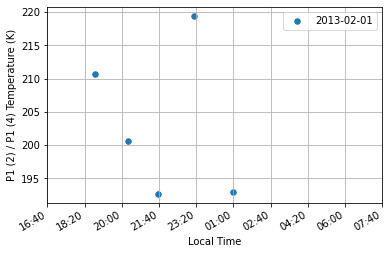

In [31]:
plot(Ltime2, Temperature, Ltime3)